### Description

#### Background: 

An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.

#### Objective:

Perform the statistical analysis to answer the following questions:

1. Explore the dataset and extract insights using Exploratory Data Analysis.
2. Do the users spend more time on the new landing page than the old landing page?
3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
4. Does the converted status depend on the preferred language? 
5. Is the mean time spent on the new page same for the different language users?


#### Data Dictionary:

1. user_id - This represents the user ID of the person visiting the website.
2. group - This represents whether the user belongs to the first group (control) or the second group (treatment).
3. landing_page - This represents whether the landing page is new or old.
4. time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.
5. converted - This represents whether the user gets converted to a subscriber of the news portal or not.
6. language_preferred - This represents the language chosen by the user to view the landing page.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('abtest.csv')

In [16]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [5]:
df.shape

(100, 6)

#### Observations 
The data frame has 100 rows and 6 columns. The data in each row corresponds to a user that visits the E-News Expresss landing page on their website. 

In [39]:
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### Observations 
All columns have 100 observations, idicating that there are no missing values in the dataset. Group, landing_page, converted and languate preferred are data type 'Object'. User_id, time_spent_on_page are numeric values. 

In [77]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,treatment,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,French,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Observations
* The mean time spent on any landing page is 5.3778 and the median is 5.415. Indicating a reltively symmetric distribution of times. 
* There are a total of 3 unique langues. French users are the most frequent out of the 100 randomly selected users. 
* Overall more users were converted than not converted. 54 converted and 46 no converted. 

### 1. EDA 

In [79]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

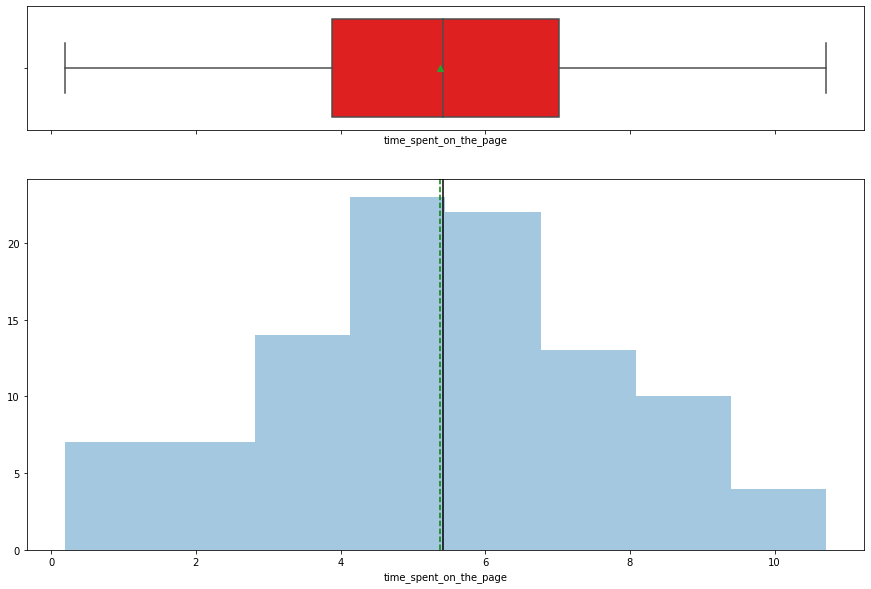

In [80]:
histogram_boxplot(df.time_spent_on_the_page)

#### Observations
* The distribution of the time spent on any landing page is symmetric with a mean and median at approximately 5.4 minutes. 
* There are no outliers in the distribution of time spent on the page.


<AxesSubplot:xlabel='converted', ylabel='time_spent_on_the_page'>

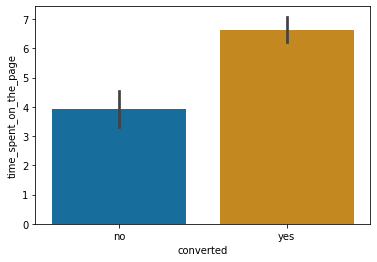

In [81]:
sns.barplot(x='converted',y='time_spent_on_the_page',palette = 'colorblind', data=df)

#### Observations
* Overall more users were converted. 

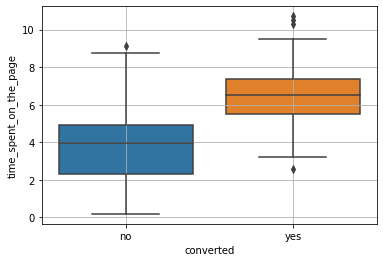

In [82]:
sns.boxplot(x="converted", y="time_spent_on_the_page", data = df)
plt.grid()
plt.show()

#### Observations
* The users that were converted to subscribers spent more time on the landing pages. 
* The users distribution of the users that were converted has more outliers. 

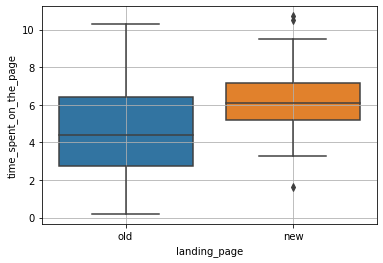

In [41]:
sns.boxplot(x="landing_page", y="time_spent_on_the_page", data = df)
plt.grid()
plt.show()

#### Observations
* The median for the time spent on the page for the new landing page is higher than the old landing page.  
* Over 75% of the time spent on the new landing page are higher than the median time for the old landing page. 
* The old landing page shows a larger range of time spent on the page than the new landing page does. 
* The new landing page has more outliers in the time spent on the page. 

<AxesSubplot:xlabel='language_preferred', ylabel='time_spent_on_the_page'>

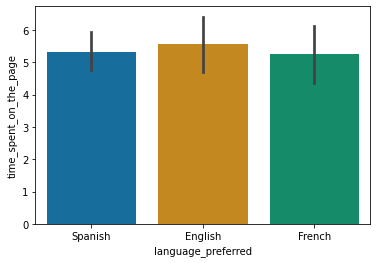

In [57]:
sns.barplot(x='language_preferred',y='time_spent_on_the_page',palette = 'colorblind',data=df)

#### Observations
* All three langueges appear to spend the approximately the same amount of time on the page.

<AxesSubplot:xlabel='landing_page', ylabel='time_spent_on_the_page'>

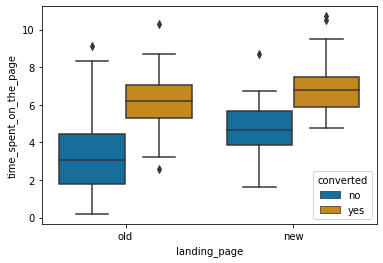

In [56]:
sns.boxplot(x="landing_page",y="time_spent_on_the_page",hue="converted",palette = 'colorblind',data=df)

#### Observations
* Users that were converted to subscribers spend more time on the page for both the new and old landing pages. 
* Users that were not converted to subscribers spend more time on the new landing page than on the old landing page. 
* Users that were converted to subscribers spend slightly more time on the new landing page than on the old landing page. 

### 2. Do the users spend more time on the new landing page than the old landing page?


<AxesSubplot:xlabel='landing_page', ylabel='time_spent_on_the_page'>

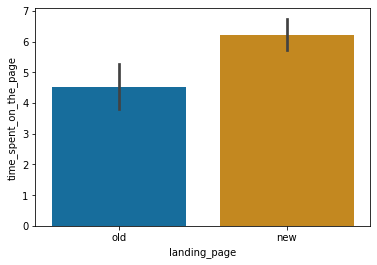

In [55]:
sns.barplot(x='landing_page',y='time_spent_on_the_page',palette = 'colorblind', data=df)


#### Hypothesis

$H_0$ : The mean time users spend on the landing page is the same for both new and old landing pages. 

$H_a$ : The mean time users spend on the new landing page is greater than the mean time users spend on the old landing page.

Mathematically, the above formulated hypotheses can be written as:

Let $\mu_1$ = the true mean time users spend on the new landing page 

and $\mu_2$ = the true mean time users spend on the old landing page

$H_0$: $\mu_1$ = $\mu_2$

$H_a$: $\mu_1$ > $\mu_2$

This is case of a one-tail test for the significance of two independent sample means. As the population standard deviation is unknown, a two-sample t-test will be appropriate for this problem. 

#### Assumptions

* Continuous Data - yes, minutes are measured on a continuous scale
* Normally distributed - yes, CLT is applied since n=50 for each sample and 50>30
* Random - yes, the users were randomly selected
* Independent - yes, the samples are independent 

#### Calculate the p-value

In [16]:
groupby_landing_page = df.groupby('landing_page').agg([np.mean,np.std])
new = groupby_landing_page.drop(labels='user_id',axis=1)
new

time_spent_on_the_page          
                               mean       std
landing_page                                 
new                          6.2232  1.817031
old                          4.5324  2.581975

Text(0, 0.5, 'Density')

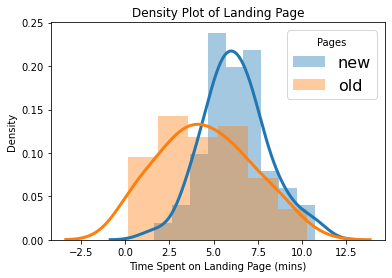

In [66]:
pages = ['new','old']
for pages in pages: 
    subset = df[df['landing_page'] == pages ]
    sns.distplot(subset['time_spent_on_the_page'], hist=True, kde=True, 
             kde_kws = {'linewidth': 3},
                 label = pages)
plt.legend(prop={'size': 16}, title = 'Pages')
plt.title('Density Plot of Landing Page')
plt.xlabel('Time Spent on Landing Page (mins)')
plt.ylabel('Density')

In [44]:
# import the required functions
from scipy.stats import ttest_ind
# prepare the data
mins_new_landing=df[df.landing_page=='new']['time_spent_on_the_page']
mins_old_landing=df[df.landing_page=='old']['time_spent_on_the_page']
# find the p-value
test_stat, p_value = ttest_ind(mins_new_landing, mins_old_landing, equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


#### Insight
Since p-value = .0001 is much less than the level of significance 1.05, we reject the null hypothesis. We have enough statistical evidence to say that the mean time users spend on the new landing is greater than the mean time users spend on the old landing. 

### 3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?


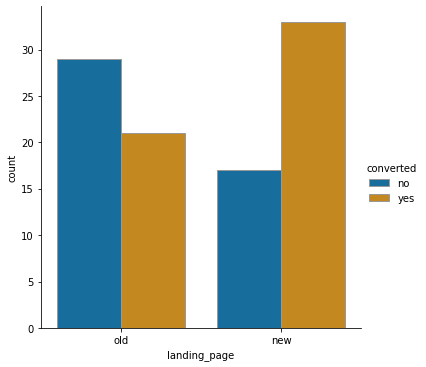

In [67]:
sns.catplot(x="landing_page", hue="converted", kind="count",
            edgecolor=".6",palette = 'colorblind',
            data=df)

#### Hypothesis

Let $p_1$ = the proportions of users who visit the new landing page and get converted  

and $p_2$ = the proportions of users who visit the old landing page and get converted 

We will test the null hypothesis

>$H_0:p_1 =p_2$

against the alternate hypothesis

>$H_a:p_1 > p_2$

This is case of a one-tail test for the significance of two independent sample proportions. A two-sample proportion z-test will be appropriate for this problem. 

#### Assumptions

*   Binomally distributed population - Yes, the users are either converted or not converted to subscribers
*   Random sampling from the population - Yes, a random sample was used for data collection
*   Can the binomial distribution approximated to normal distribution - Yes, CLT is applied: 

In [46]:
from scipy.stats import chi2_contingency
#preparing the contingency table
cont_table= pd.crosstab(df['landing_page'],df['converted'])
cont_table

converted,no,yes
landing_page,,
new,17,33
old,29,21


The table above show the results of the total successes and failures in the sample proportions. All values are $\geq$ 10

#### Calculate the p-value

In [5]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest


converted = np.array([33, 21])


users = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(converted, users, alternative = 'larger')
print('The p-value is ' + str(p_value))

The p-value is 0.008026308204056278


#### Insight
Since p-value = 0.008 is less than the level of significance 0.05, we reject the null hypothesis. We have enough statistical evidence to say that the conversion rate for the new landing page is greater than the conversion rate for the old landing page. 

### 4. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

<AxesSubplot:xlabel='count', ylabel='converted'>

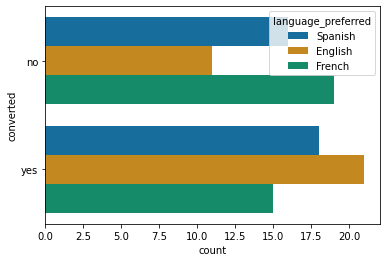

In [69]:
sns.countplot(y='converted', hue = 'language_preferred',palette = 'colorblind', data = df)

### Hypothesis

We will test the null hypothesis

>$H_0:$ Converted status is independent of preferred language.

against the alternate hypothesis

>$H_a:$ Converted status depends on preferred language.

The formulated hypotheses can be tested using a Chi-square test of independence of attributes, concerning the two categorical variables, converted status (yes/no) and preferred language (spanish/english/french).

In [55]:
#preparing the contingency table
cont_table2= pd.crosstab(df['language_preferred'],df['converted'])
cont_table2

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


#### Assumptions

* Categorical variables - Yes

* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.

* Random sampling from the population - Yes, a random sample was used for data collection.

In [56]:
stats.chi2_contingency(cont_table2)

(3.0930306905370832,
 0.2129888748754345,
 2,
 array([[14.72, 17.28],
        [15.64, 18.36],
        [15.64, 18.36]]))

#### Calculate p-value

In [57]:
# find the p-value
chi, p_value, dof, expected = chi2_contingency(cont_table2)
print('The p-value is', p_value)

The p-value is 0.2129888748754345


#### Insights 

Since p-value = 0.2130 is greater than the level of significance 0.05, we fail to reject the null hypothesis. We do not have enough statistical evidence to say that converted status and language preference is dependent. 

### 5. Is the mean time spent on the new page same for the different language users?

In [24]:
new_landing = df[(df['landing_page']=='new')]
new_landing.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French


In [96]:
language = new_landing.groupby('language_preferred').mean()
df2 = language.drop(labels='user_id',axis=1)
df2

,time_spent_on_the_page
language_preferred,
English,6.663750
French,6.196471
Spanish,5.835294


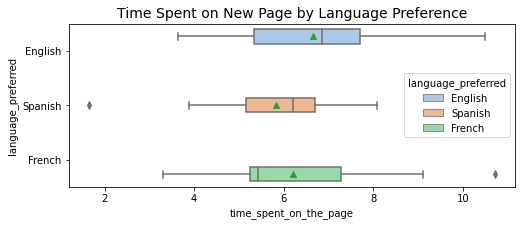

In [103]:
fig, ax = plt.subplots(figsize = (8,3))

a = sns.boxplot(x='time_spent_on_the_page' , y = "language_preferred" ,showmeans=True, palette = 'pastel',data = new_landing, hue = 'language_preferred')
a.set_title("Time Spent on New Page by Language Preference", fontsize=14)
plt.show()

#### Hypothesis

Let $\mu_1$ = the true mean time users whose language preference is English spend on the new page   

and

$\mu_2$ = the true mean time users whose language preference is French spend on the new page

and

$\mu_3$ = the true mean time users whose language preference is Spanish spend on the new page

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one of the means times is different from the rest. 

### Assumptions
The normality and equality of variance assumptions need to be checked.

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

#### Shapiro-Wilk’s test
We will test the null hypothesis

>$H_0:$ Time spent on the new page follows a normal distribution against

against the alternative hypothesis

>$H_a:$ Time spent on the new page does not follow a normal distribution

In [79]:
from scipy import stats


w, p_value = stats.shapiro(new_landing['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

#### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [78]:
from scipy.stats import levene
statistic, p_value = levene( new_landing['time_spent_on_the_page'][new_landing['language_preferred']=="English"], 
                                   new_landing['time_spent_on_the_page'][new_landing['language_preferred']=="Spanish"], 
                                   new_landing['time_spent_on_the_page'][new_landing['language_preferred']=="French"])

print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

#### All assumptions are satisfied: 

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, the data was collecte using a random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.

In [80]:
from scipy.stats import f_oneway


test_stat, p_value = f_oneway(new_landing.loc[new_landing['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              new_landing.loc[new_landing['language_preferred'] == 'Spanish', 'time_spent_on_the_page'],
                              new_landing.loc[new_landing['language_preferred'] == 'French', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Insight

As the p-value = 0.432 is greater than the significance level 0.05, we fail to reject the null hypothesis. Hence, we do not have enough statistical significance to conclude that  at least one of the means times is different from the rest.

# Overall Conclusions and Recommendations

- The new landing is more successful in converting users to subscribers. 

- The new landing is also effective in getting users to spend more time on the E-News online news portal. 

- It is recommended that the new landing page be available for all users due to its success in these two areas. 

